In [1]:
import statsmodels.api as sm
import pandas as pd
from statannot import add_stat_annotation
import seaborn as sns
import matplotlib.pyplot as plt

### Import frequency file

In [2]:
dftest = pd.read_csv("/mnt/spuccio_hpcserver2/SP026_dev_cytophenograph/cluster_freq_test2.txt",sep="\t",header=0)

In [3]:
dftest.head()

,Cluster,pt10_Bl,pt10_PBMC,pt10_Peri,pt10_Tum,pt11_Bl,pt11_PBMC,pt11_Peri,pt11_Tum,pt12_Bl,...,pt7_Peri,pt7_Tum,pt8_Bl,pt8_PBMC,pt8_Peri,pt8_Tum,pt9_Bl,pt9_PBMC,pt9_Peri,pt9_Tum
0,1,22.45,11.95,14.85,16.712479,22.70,1.30,20.90,5.90,31.45,...,33.55,12.90,7.00,6.10,9.50,7.542579,18.70,6.45,11.184211,10.35
1,2,28.70,62.90,38.90,5.827378,8.60,12.90,4.25,1.75,9.80,...,15.15,2.20,0.85,6.50,11.05,2.433090,29.00,11.40,32.565789,5.25
2,3,7.00,1.95,8.45,4.947774,5.55,5.70,5.10,23.75,5.30,...,3.75,26.75,5.65,1.50,9.00,20.802920,7.70,1.40,7.565789,9.85
3,4,7.05,11.45,4.30,10.115448,13.75,0.95,12.55,3.90,27.90,...,14.30,13.55,8.20,13.95,16.50,8.637470,8.40,7.20,8.552632,11.20
4,5,0.10,0.05,0.05,0.384827,14.75,3.50,14.05,4.05,4.85,...,0.35,0.10,0.10,25.25,1.10,2.189781,0.35,39.80,0.328947,1.00


### Get melted dataframe

In [4]:
dftest_melted = pd.melt(dftest,value_vars=['Cluster'],id_vars=dftest.columns[1:])

### Transpose

In [5]:
dftest_melted_T =  dftest_melted.T

In [6]:
dftest_melted_T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
pt10_Bl,22.45,28.7,7.0,7.05,0.1,18.7,0.8,2.25,7.2,0.95,1.45,0.2,1.5,1.0,0.5,0.15,0.0,0.0
pt10_PBMC,11.95,62.9,1.95,11.45,0.05,7.9,0.0,1.25,0.1,0.75,0.4,0.1,0.2,0.25,0.3,0.0,0.45,0.0
pt10_Peri,14.85,38.9,8.45,4.3,0.05,11.2,0.15,7.2,4.4,0.45,2.5,1.15,4.1,0.85,1.25,0.0,0.2,0.0
pt10_Tum,16.712479,5.827378,4.947774,10.115448,0.384827,8.905992,1.099505,13.908741,7.091809,0.824629,3.518417,21.770203,2.638813,0.934579,1.099505,0.109951,0.109951,0.0
pt11_Bl,22.7,8.6,5.55,13.75,14.75,7.25,0.35,5.15,2.5,0.4,9.15,0.15,5.8,1.35,2.5,0.0,0.05,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pt9_PBMC,6.45,11.4,1.4,7.2,39.8,0.85,0.25,0.55,0.05,29.2,1.2,0.15,0.4,0.15,0.5,0.0,0.25,0.2
pt9_Peri,11.184211,32.565789,7.565789,8.552632,0.328947,10.197368,3.289474,5.592105,6.578947,0.0,2.960526,2.302632,0.0,0.657895,6.907895,0.0,0.986842,0.328947
pt9_Tum,10.35,5.25,9.85,11.2,1.0,7.65,1.1,29.4,6.05,0.05,6.95,8.85,0.2,0.75,0.6,0.0,0.7,0.05
variable,Cluster,Cluster,Cluster,Cluster,Cluster,Cluster,Cluster,Cluster,Cluster,Cluster,Cluster,Cluster,Cluster,Cluster,Cluster,Cluster,Cluster,Cluster


### Change header and remove variable row

In [7]:
new_header = dftest_melted_T.iloc[-1] #grab the first row for the header
dftest_melted_T = dftest_melted_T[:-2] #take the data less the header row
dftest_melted_T.columns = new_header #set the header row as the df header

In [8]:
dftest_melted_T.head()

value,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
pt10_Bl,22.45,28.7,7.0,7.05,0.1,18.7,0.8,2.25,7.2,0.95,1.45,0.2,1.5,1.0,0.5,0.15,0.0,0.0
pt10_PBMC,11.95,62.9,1.95,11.45,0.05,7.9,0.0,1.25,0.1,0.75,0.4,0.1,0.2,0.25,0.3,0.0,0.45,0.0
pt10_Peri,14.85,38.9,8.45,4.3,0.05,11.2,0.15,7.2,4.4,0.45,2.5,1.15,4.1,0.85,1.25,0.0,0.2,0.0
pt10_Tum,16.712479,5.827378,4.947774,10.115448,0.384827,8.905992,1.099505,13.908741,7.091809,0.824629,3.518417,21.770203,2.638813,0.934579,1.099505,0.109951,0.109951,0.0
pt11_Bl,22.7,8.6,5.55,13.75,14.75,7.25,0.35,5.15,2.5,0.4,9.15,0.15,5.8,1.35,2.5,0.0,0.05,0.0


### Add Tissue Label

In [9]:
dftest_melted_T["Tissue_origin"] =  dftest_melted_T.index.map(lambda x: "Blood" if "Bl" in x else "PBMC" if "PBMC" in x else "Peritumor" if "Peri" in x else "Tumor" )

<ipython-input-9-49a19b420b3d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftest_melted_T["Tissue_origin"] =  dftest_melted_T.index.map(lambda x: "Blood" if "Bl" in x else "PBMC" if "PBMC" in x else "Peritumor" if "Peri" in x else "Tumor" )


In [10]:
dftest_melted_T

value,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,Tissue_origin
pt10_Bl,22.45,28.7,7.0,7.05,0.1,18.7,0.8,2.25,7.2,0.95,1.45,0.2,1.5,1.0,0.5,0.15,0.0,0.0,Blood
pt10_PBMC,11.95,62.9,1.95,11.45,0.05,7.9,0.0,1.25,0.1,0.75,0.4,0.1,0.2,0.25,0.3,0.0,0.45,0.0,PBMC
pt10_Peri,14.85,38.9,8.45,4.3,0.05,11.2,0.15,7.2,4.4,0.45,2.5,1.15,4.1,0.85,1.25,0.0,0.2,0.0,Peritumor
pt10_Tum,16.712479,5.827378,4.947774,10.115448,0.384827,8.905992,1.099505,13.908741,7.091809,0.824629,3.518417,21.770203,2.638813,0.934579,1.099505,0.109951,0.109951,0.0,Tumor
pt11_Bl,22.7,8.6,5.55,13.75,14.75,7.25,0.35,5.15,2.5,0.4,9.15,0.15,5.8,1.35,2.5,0.0,0.05,0.0,Blood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pt8_Tum,7.542579,2.43309,20.80292,8.63747,2.189781,6.082725,0.729927,12.16545,7.177616,0.729927,8.63747,20.194647,0.0,1.703163,0.486618,0.0,0.364964,0.121655,Tumor
pt9_Bl,18.7,29.0,7.7,8.4,0.35,17.3,3.25,1.85,8.35,0.35,1.65,0.3,0.4,1.1,1.05,0.1,0.1,0.05,Blood
pt9_PBMC,6.45,11.4,1.4,7.2,39.8,0.85,0.25,0.55,0.05,29.2,1.2,0.15,0.4,0.15,0.5,0.0,0.25,0.2,PBMC
pt9_Peri,11.184211,32.565789,7.565789,8.552632,0.328947,10.197368,3.289474,5.592105,6.578947,0.0,2.960526,2.302632,0.0,0.657895,6.907895,0.0,0.986842,0.328947,Peritumor


### Plot and statistical test

In [11]:
colors = ["#2F7D75","#DDB5CF","#42B6C0","#880E0C"]
sns.set_palette(colors)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

PBMC v.s. Blood: Mann-Whitney-Wilcoxon test two-sided, P_val=4.785e-02 U_stat=7.500e+01
Blood v.s. Peritumor: Mann-Whitney-Wilcoxon test two-sided, P_val=5.216e-01 U_stat=1.105e+02
Peritumor v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=4.242e-04 U_stat=2.220e+02
Blood v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=4.374e-02 U_stat=1.820e+02
PBMC v.s. Peritumor: Mann-Whitney-Wilcoxon test two-sided, P_val=1.304e-04 U_stat=2.600e+01
PBMC v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=8.950e-01 U_stat=1.240e+02


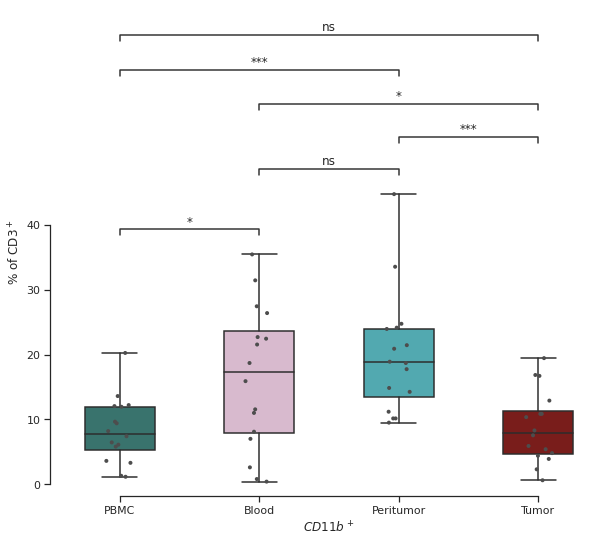

In [12]:
sns.set(rc={'font.family':'Arial', 'font.serif':'Arial'})
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 9))
# Plot the orbital period with horizontal boxes
sns.boxplot(x="Tissue_origin", y=1, data=dftest_melted_T,
            whis=[0, 100], width=.5, palette=sns.color_palette(colors),order=['PBMC','Blood','Peritumor','Tumor'])
# Add in points to show each observation
sns.stripplot(x="Tissue_origin", y=1, data=dftest_melted_T,order=['PBMC','Blood','Peritumor','Tumor'],
              size=4, color=".3", linewidth=0)
# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="% of CD3$^+$")
ax.set(xlabel="$CD11b^+$")
sns.despine(trim=True, left=False)
add_stat_annotation(ax, data=dftest_melted_T, x="Tissue_origin", y=1, order=['PBMC','Blood','Peritumor','Tumor'],
                    box_pairs=[("Blood","PBMC"),("Blood", "Peritumor"),("Blood","Tumor"),("PBMC","Peritumor"),("PBMC","Tumor"),("Peritumor","Tumor")],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2,comparisons_correction=None)
plt.savefig("/home/spuccio/C1_mieloidi.pdf",dpi=300,format="pdf")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

PBMC v.s. Blood: Mann-Whitney-Wilcoxon test two-sided, P_val=2.662e-01 U_stat=1.580e+02
Blood v.s. Peritumor: Mann-Whitney-Wilcoxon test two-sided, P_val=7.774e-01 U_stat=1.360e+02
Peritumor v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=4.984e-03 U_stat=2.030e+02
Blood v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=2.564e-03 U_stat=2.085e+02
PBMC v.s. Peritumor: Mann-Whitney-Wilcoxon test two-sided, P_val=1.269e-01 U_stat=1.690e+02
PBMC v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=2.048e-05 U_stat=2.415e+02


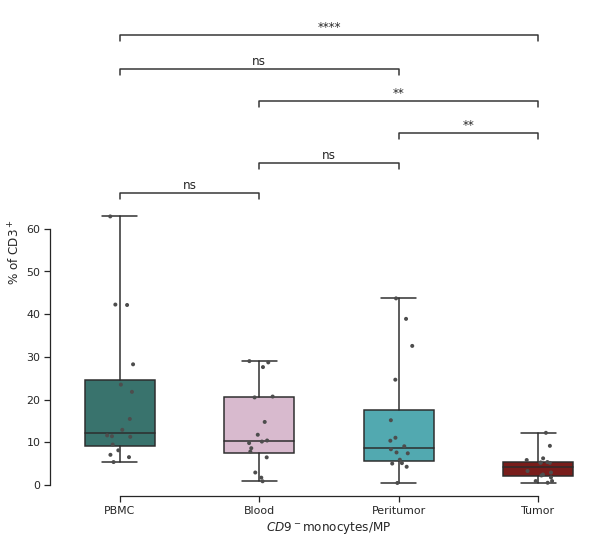

In [13]:
sns.set(rc={'font.family':'Arial', 'font.serif':'Arial'})
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 9))
# Plot the orbital period with horizontal boxes
sns.boxplot(x="Tissue_origin", y=2, data=dftest_melted_T,
            whis=[0, 100], width=.5, palette=sns.color_palette(colors),order=['PBMC','Blood','Peritumor','Tumor'])
# Add in points to show each observation
sns.stripplot(x="Tissue_origin", y=2, data=dftest_melted_T,order=['PBMC','Blood','Peritumor','Tumor'],
              size=4, color=".3", linewidth=0)
# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="% of CD3$^+$")
ax.set(xlabel="$CD9^-$monocytes/MP")
sns.despine(trim=True, left=False)
add_stat_annotation(ax, data=dftest_melted_T, x="Tissue_origin", y=2, order=['PBMC','Blood','Peritumor','Tumor'],
                    box_pairs=[("Blood","PBMC"),("Blood", "Peritumor"),("Blood","Tumor"),("PBMC","Peritumor"),("PBMC","Tumor"),("Peritumor","Tumor")],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2,comparisons_correction=None)
plt.savefig("/home/spuccio/C2_mieloidi.pdf",dpi=300,format="pdf")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

PBMC v.s. Blood: Mann-Whitney-Wilcoxon test two-sided, P_val=9.549e-01 U_stat=1.260e+02
Blood v.s. Peritumor: Mann-Whitney-Wilcoxon test two-sided, P_val=6.207e-02 U_stat=7.800e+01
Peritumor v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=3.021e-02 U_stat=1.860e+02
Blood v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=6.375e-01 U_stat=1.410e+02
PBMC v.s. Peritumor: Mann-Whitney-Wilcoxon test two-sided, P_val=3.021e-02 U_stat=7.000e+01
PBMC v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=9.850e-01 U_stat=1.290e+02


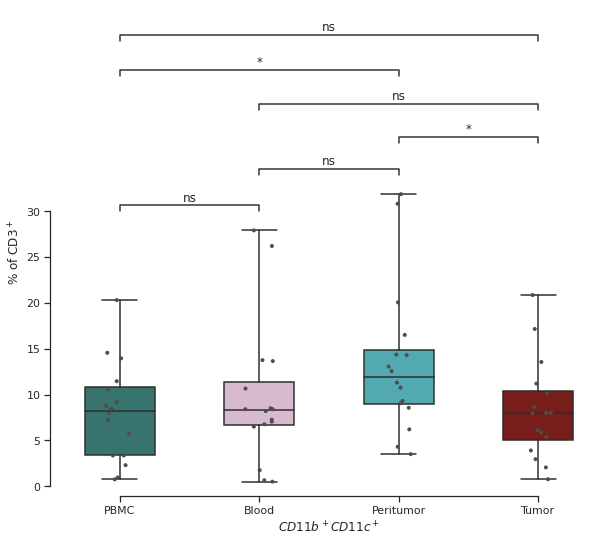

In [14]:
sns.set(rc={'font.family':'Arial', 'font.serif':'Arial'})
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 9))
# Plot the orbital period with horizontal boxes
sns.boxplot(x="Tissue_origin", y=4, data=dftest_melted_T,
            whis=[0, 100], width=.5, palette=sns.color_palette(colors),order=['PBMC','Blood','Peritumor','Tumor'])
# Add in points to show each observation
sns.stripplot(x="Tissue_origin", y=4, data=dftest_melted_T,order=['PBMC','Blood','Peritumor','Tumor'],
              size=4, color=".3", linewidth=0)
# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="% of CD3$^+$")
ax.set(xlabel="$CD11b^+$$CD11c^+$")
sns.despine(trim=True, left=False)
add_stat_annotation(ax, data=dftest_melted_T, x="Tissue_origin", y=4, order=['PBMC','Blood','Peritumor','Tumor'],
                    box_pairs=[("Blood","PBMC"),("Blood", "Peritumor"),("Blood","Tumor"),("PBMC","Peritumor"),("PBMC","Tumor"),("Peritumor","Tumor")],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2,comparisons_correction=None)
plt.savefig("/home/spuccio/C4_mieloidi.pdf",dpi=300,format="pdf")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

PBMC v.s. Blood: Mann-Whitney-Wilcoxon test two-sided, P_val=2.125e-03 U_stat=4.600e+01
Blood v.s. Peritumor: Mann-Whitney-Wilcoxon test two-sided, P_val=3.964e-01 U_stat=1.050e+02
Peritumor v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=8.637e-02 U_stat=1.740e+02
Blood v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=8.065e-01 U_stat=1.350e+02
PBMC v.s. Peritumor: Mann-Whitney-Wilcoxon test two-sided, P_val=1.302e-04 U_stat=2.600e+01
PBMC v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=1.269e-03 U_stat=4.200e+01


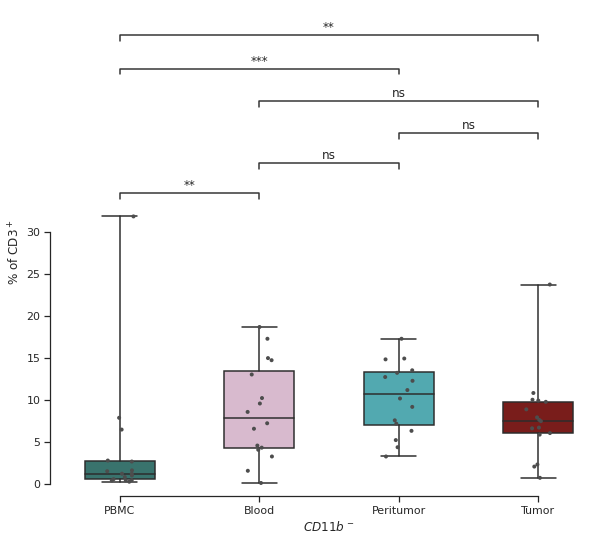

In [15]:
sns.set(rc={'font.family':'Arial', 'font.serif':'Arial'})
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 9))
# Plot the orbital period with horizontal boxes
sns.boxplot(x="Tissue_origin", y=6, data=dftest_melted_T,
            whis=[0, 100], width=.5, palette=sns.color_palette(colors),order=['PBMC','Blood','Peritumor','Tumor'])
# Add in points to show each observation
sns.stripplot(x="Tissue_origin", y=6, data=dftest_melted_T,order=['PBMC','Blood','Peritumor','Tumor'],
              size=4, color=".3", linewidth=0)
# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="% of CD3$^+$")
ax.set(xlabel="$CD11b^-$")
sns.despine(trim=True, left=False)
add_stat_annotation(ax, data=dftest_melted_T, x="Tissue_origin", y=6, order=['PBMC','Blood','Peritumor','Tumor'],
                    box_pairs=[("Blood","PBMC"),("Blood", "Peritumor"),("Blood","Tumor"),("PBMC","Peritumor"),("PBMC","Tumor"),("Peritumor","Tumor")],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2,comparisons_correction=None)
plt.savefig("/home/spuccio/C6_mieloidi.pdf",dpi=300,format="pdf")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

PBMC v.s. Blood: Mann-Whitney-Wilcoxon test two-sided, P_val=8.856e-04 U_stat=3.950e+01
Blood v.s. Peritumor: Mann-Whitney-Wilcoxon test two-sided, P_val=4.736e-01 U_stat=1.475e+02
Peritumor v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=6.646e-01 U_stat=1.160e+02
Blood v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=5.975e-01 U_stat=1.425e+02
PBMC v.s. Peritumor: Mann-Whitney-Wilcoxon test two-sided, P_val=1.086e-03 U_stat=4.100e+01
PBMC v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=3.882e-04 U_stat=3.350e+01


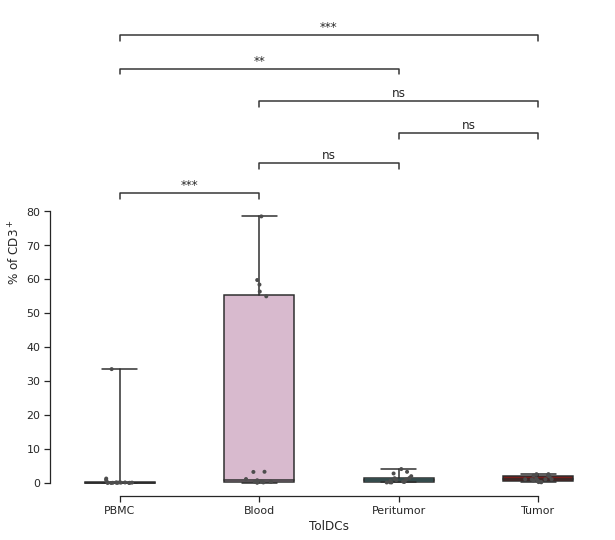

In [16]:
sns.set(rc={'font.family':'Arial', 'font.serif':'Arial'})
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 9))
# Plot the orbital period with horizontal boxes
sns.boxplot(x="Tissue_origin", y=7, data=dftest_melted_T,
            whis=[0, 100], width=.5, palette=sns.color_palette(colors),order=['PBMC','Blood','Peritumor','Tumor'])
# Add in points to show each observation
sns.stripplot(x="Tissue_origin", y=7, data=dftest_melted_T,order=['PBMC','Blood','Peritumor','Tumor'],
              size=4, color=".3", linewidth=0)
# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="% of CD3$^+$")
ax.set(xlabel="TolDCs")
sns.despine(trim=True, left=False)
add_stat_annotation(ax, data=dftest_melted_T, x="Tissue_origin", y=7, order=['PBMC','Blood','Peritumor','Tumor'],
                    box_pairs=[("Blood","PBMC"),("Blood", "Peritumor"),("Blood","Tumor"),("PBMC","Peritumor"),("PBMC","Tumor"),("Peritumor","Tumor")],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2,comparisons_correction=None)
plt.savefig("/home/spuccio/C7_mieloidi.pdf",dpi=300,format="pdf")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

PBMC v.s. Blood: Mann-Whitney-Wilcoxon test two-sided, P_val=3.331e-05 U_stat=1.750e+01
Blood v.s. Peritumor: Mann-Whitney-Wilcoxon test two-sided, P_val=3.469e-03 U_stat=5.000e+01
Peritumor v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=3.646e-02 U_stat=7.200e+01
Blood v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=1.298e-04 U_stat=2.600e+01
PBMC v.s. Peritumor: Mann-Whitney-Wilcoxon test two-sided, P_val=3.233e-06 U_stat=4.000e+00
PBMC v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=1.125e-05 U_stat=1.100e+01


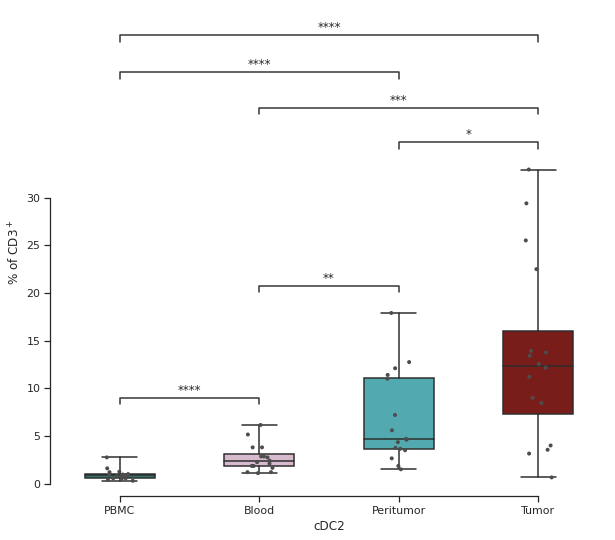

In [17]:
sns.set(rc={'font.family':'Arial', 'font.serif':'Arial'})
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 9))
# Plot the orbital period with horizontal boxes
sns.boxplot(x="Tissue_origin", y=8, data=dftest_melted_T,
            whis=[0, 100], width=.5, palette=sns.color_palette(colors),order=['PBMC','Blood','Peritumor','Tumor'])
# Add in points to show each observation
sns.stripplot(x="Tissue_origin", y=8, data=dftest_melted_T,order=['PBMC','Blood','Peritumor','Tumor'],
              size=4, color=".3", linewidth=0)
# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="% of CD3$^+$")
ax.set(xlabel="cDC2")
sns.despine(trim=True, left=False)
add_stat_annotation(ax, data=dftest_melted_T, x="Tissue_origin", y=8, order=['PBMC','Blood','Peritumor','Tumor'],
                    box_pairs=[("Blood","PBMC"),("Blood", "Peritumor"),("Blood","Tumor"),("PBMC","Peritumor"),("PBMC","Tumor"),("Peritumor","Tumor")],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2,comparisons_correction=None)
plt.savefig("/home/spuccio/C8_mieloidi.pdf",dpi=300,format="pdf")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

PBMC v.s. Blood: Mann-Whitney-Wilcoxon test two-sided, P_val=9.587e-05 U_stat=2.320e+02
Blood v.s. Peritumor: Mann-Whitney-Wilcoxon test two-sided, P_val=9.089e-03 U_stat=1.975e+02
Peritumor v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=6.756e-01 U_stat=1.395e+02
Blood v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=6.873e-03 U_stat=2.000e+02
PBMC v.s. Peritumor: Mann-Whitney-Wilcoxon test two-sided, P_val=1.416e-05 U_stat=2.435e+02
PBMC v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=1.363e-05 U_stat=2.435e+02


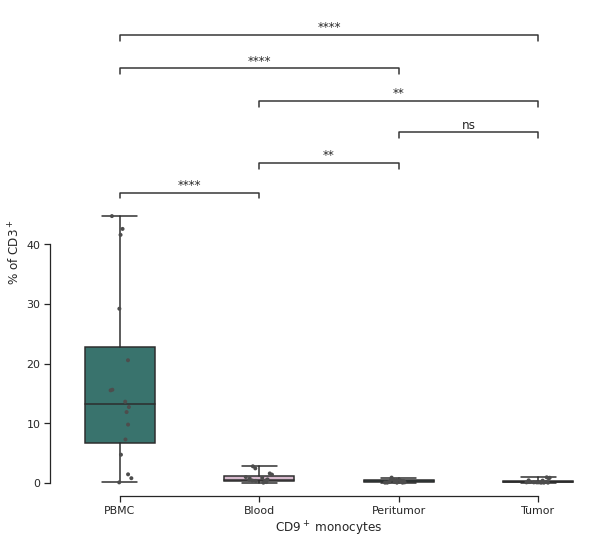

In [18]:
sns.set(rc={'font.family':'Arial', 'font.serif':'Arial'})
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 9))
# Plot the orbital period with horizontal boxes
sns.boxplot(x="Tissue_origin", y=10, data=dftest_melted_T,
            whis=[0, 100], width=.5, palette=sns.color_palette(colors),order=['PBMC','Blood','Peritumor','Tumor'])
# Add in points to show each observation
sns.stripplot(x="Tissue_origin", y=10, data=dftest_melted_T,order=['PBMC','Blood','Peritumor','Tumor'],
              size=4, color=".3", linewidth=0)
# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="% of CD3$^+$")
ax.set(xlabel="CD9$^+$ monocytes")
sns.despine(trim=True, left=False)
add_stat_annotation(ax, data=dftest_melted_T, x="Tissue_origin", y=10, order=['PBMC','Blood','Peritumor','Tumor'],
                    box_pairs=[("Blood","PBMC"),("Blood", "Peritumor"),("Blood","Tumor"),("PBMC","Peritumor"),("PBMC","Tumor"),("Peritumor","Tumor")],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2,comparisons_correction=None)
plt.savefig("/home/spuccio/C10_mielodi.pdf",dpi=300,format="pdf")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

PBMC v.s. Blood: Mann-Whitney-Wilcoxon test two-sided, P_val=6.761e-01 U_stat=1.395e+02
Blood v.s. Peritumor: Mann-Whitney-Wilcoxon test two-sided, P_val=6.811e-03 U_stat=5.600e+01
Peritumor v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=6.449e-05 U_stat=2.150e+01
Blood v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=1.491e-06 U_stat=0.000e+00
PBMC v.s. Peritumor: Mann-Whitney-Wilcoxon test two-sided, P_val=1.326e-02 U_stat=6.200e+01
PBMC v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=2.193e-06 U_stat=2.000e+00


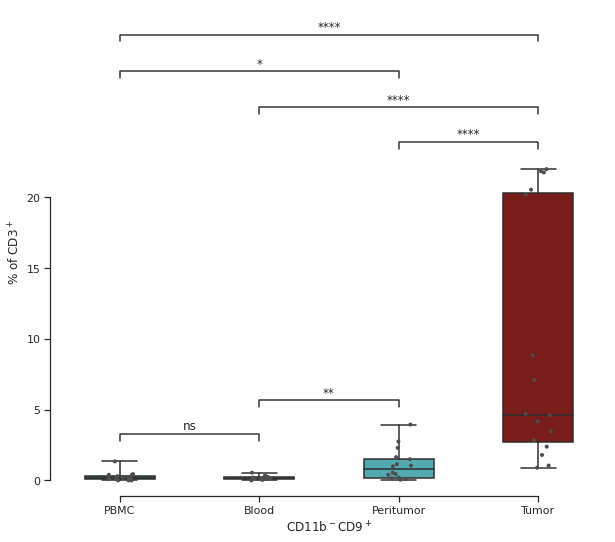

In [19]:
sns.set(rc={'font.family':'Arial', 'font.serif':'Arial'})
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 9))
# Plot the orbital period with horizontal boxes
sns.boxplot(x="Tissue_origin", y=12, data=dftest_melted_T,
            whis=[0, 100], width=.5, palette=sns.color_palette(colors),order=['PBMC','Blood','Peritumor','Tumor'])
# Add in points to show each observation
sns.stripplot(x="Tissue_origin", y=12, data=dftest_melted_T,order=['PBMC','Blood','Peritumor','Tumor'],
              size=4, color=".3", linewidth=0)
# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="% of CD3$^+$")
ax.set(xlabel="CD11b$^-$CD9$^+$")
sns.despine(trim=True, left=False)
add_stat_annotation(ax, data=dftest_melted_T, x="Tissue_origin", y=12, order=['PBMC','Blood','Peritumor','Tumor'],
                    box_pairs=[("Blood","PBMC"),("Blood", "Peritumor"),("Blood","Tumor"),("PBMC","Peritumor"),("PBMC","Tumor"),("Peritumor","Tumor")],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2,comparisons_correction=None)
plt.savefig("/home/spuccio/C12_mielodi.pdf",dpi=300,format="pdf")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

PBMC v.s. Blood: Mann-Whitney-Wilcoxon test two-sided, P_val=5.844e-01 U_stat=1.130e+02
Blood v.s. Peritumor: Mann-Whitney-Wilcoxon test two-sided, P_val=4.854e-01 U_stat=1.090e+02
Peritumor v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=1.090e-01 U_stat=1.710e+02
Blood v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=5.090e-01 U_stat=1.460e+02
PBMC v.s. Peritumor: Mann-Whitney-Wilcoxon test two-sided, P_val=1.091e-01 U_stat=8.500e+01
PBMC v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=9.399e-01 U_stat=1.255e+02


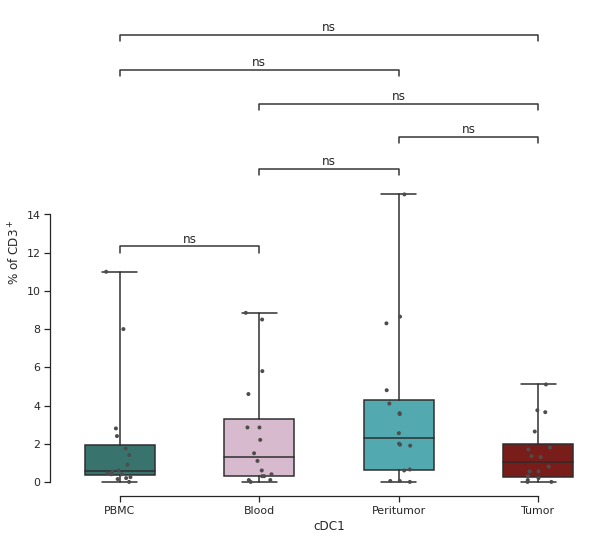

In [20]:
sns.set(rc={'font.family':'Arial', 'font.serif':'Arial'})
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 9))
# Plot the orbital period with horizontal boxes
sns.boxplot(x="Tissue_origin", y=13, data=dftest_melted_T,
            whis=[0, 100], width=.5, palette=sns.color_palette(colors),order=['PBMC','Blood','Peritumor','Tumor'])
# Add in points to show each observation
sns.stripplot(x="Tissue_origin", y=13, data=dftest_melted_T,order=['PBMC','Blood','Peritumor','Tumor'],
              size=4, color=".3", linewidth=0)
# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="% of CD3$^+$")
ax.set(xlabel="cDC1")
sns.despine(trim=True, left=False)
add_stat_annotation(ax, data=dftest_melted_T, x="Tissue_origin", y=13, order=['PBMC','Blood','Peritumor','Tumor'],
                    box_pairs=[("Blood","PBMC"),("Blood", "Peritumor"),("Blood","Tumor"),("PBMC","Peritumor"),("PBMC","Tumor"),("Peritumor","Tumor")],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2,comparisons_correction=None)
plt.savefig("/home/spuccio/C13_mieloidi.pdf",dpi=300,format="pdf")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

PBMC v.s. Blood: Mann-Whitney-Wilcoxon test two-sided, P_val=9.399e-01 U_stat=1.255e+02
Blood v.s. Peritumor: Mann-Whitney-Wilcoxon test two-sided, P_val=4.176e-01 U_stat=1.060e+02
Peritumor v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=5.684e-02 U_stat=1.790e+02
Blood v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=3.174e-01 U_stat=1.550e+02
PBMC v.s. Peritumor: Mann-Whitney-Wilcoxon test two-sided, P_val=5.845e-01 U_stat=1.130e+02
PBMC v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=5.462e-01 U_stat=1.445e+02


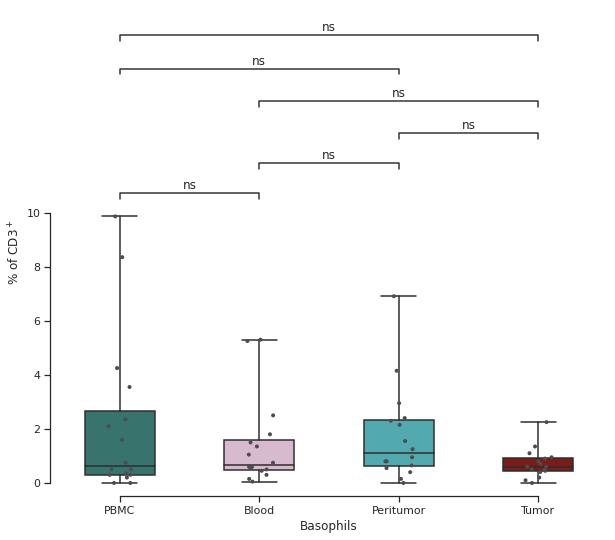

In [21]:
sns.set(rc={'font.family':'Arial', 'font.serif':'Arial'})
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 9))
# Plot the orbital period with horizontal boxes
sns.boxplot(x="Tissue_origin", y=15, data=dftest_melted_T,
            whis=[0, 100], width=.5, palette=sns.color_palette(colors),order=['PBMC','Blood','Peritumor','Tumor'])
# Add in points to show each observation
sns.stripplot(x="Tissue_origin", y=15, data=dftest_melted_T,order=['PBMC','Blood','Peritumor','Tumor'],
              size=4, color=".3", linewidth=0)
# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="% of CD3$^+$")
ax.set(xlabel="Basophils")
sns.despine(trim=True, left=False)
add_stat_annotation(ax, data=dftest_melted_T, x="Tissue_origin", y=15, order=['PBMC','Blood','Peritumor','Tumor'],
                    box_pairs=[("Blood","PBMC"),("Blood", "Peritumor"),("Blood","Tumor"),("PBMC","Peritumor"),("PBMC","Tumor"),("Peritumor","Tumor")],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2,comparisons_correction=None)
plt.savefig("/home/spuccio/C15_mieloidi.pdf",dpi=300,format="pdf")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

PBMC v.s. Blood: Mann-Whitney-Wilcoxon test two-sided, P_val=3.731e-01 U_stat=1.520e+02
Blood v.s. Peritumor: Mann-Whitney-Wilcoxon test two-sided, P_val=1.070e-02 U_stat=6.000e+01
Peritumor v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=6.105e-01 U_stat=1.420e+02
Blood v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=3.278e-02 U_stat=7.100e+01
PBMC v.s. Peritumor: Mann-Whitney-Wilcoxon test two-sided, P_val=9.276e-02 U_stat=8.300e+01
PBMC v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=2.414e-01 U_stat=9.650e+01


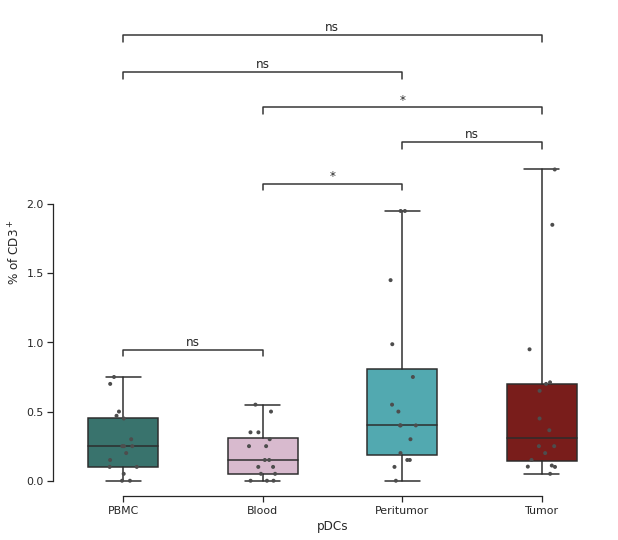

In [22]:
sns.set(rc={'font.family':'Arial', 'font.serif':'Arial'})
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 9))
# Plot the orbital period with horizontal boxes
sns.boxplot(x="Tissue_origin", y=17, data=dftest_melted_T,
            whis=[0, 100], width=.5, palette=sns.color_palette(colors),order=['PBMC','Blood','Peritumor','Tumor'])
# Add in points to show each observation
sns.stripplot(x="Tissue_origin", y=17, data=dftest_melted_T,order=['PBMC','Blood','Peritumor','Tumor'],
              size=4, color=".3", linewidth=0)
# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="% of CD3$^+$")
ax.set(xlabel="pDCs")
sns.despine(trim=True, left=False)
add_stat_annotation(ax, data=dftest_melted_T, x="Tissue_origin", y=17, order=['PBMC','Blood','Peritumor','Tumor'],
                    box_pairs=[("Blood","PBMC"),("Blood", "Peritumor"),("Blood","Tumor"),("PBMC","Peritumor"),("PBMC","Tumor"),("Peritumor","Tumor")],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2,comparisons_correction=None)
plt.savefig("/home/spuccio/C17_mieloidi.pdf",dpi=300,format="pdf")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

PBMC v.s. Blood: Mann-Whitney-Wilcoxon test two-sided, P_val=5.807e-01 U_stat=1.140e+02
Blood v.s. Peritumor: Mann-Whitney-Wilcoxon test two-sided, P_val=3.846e-02 U_stat=1.750e+02
Peritumor v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=1.956e-02 U_stat=7.250e+01
Blood v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=7.976e-01 U_stat=1.350e+02
PBMC v.s. Peritumor: Mann-Whitney-Wilcoxon test two-sided, P_val=1.187e-01 U_stat=1.625e+02
PBMC v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=6.753e-01 U_stat=1.170e+02


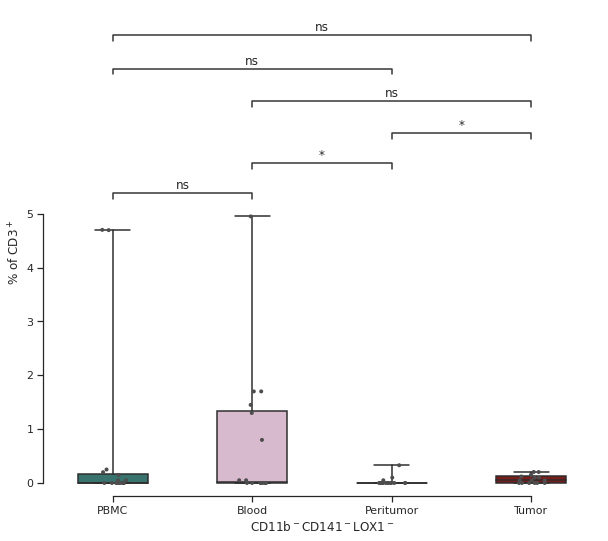

In [23]:
sns.set(rc={'font.family':'Arial', 'font.serif':'Arial'})
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 9))
# Plot the orbital period with horizontal boxes
sns.boxplot(x="Tissue_origin", y=18, data=dftest_melted_T,
            whis=[0, 100], width=.5, palette=sns.color_palette(colors),order=['PBMC','Blood','Peritumor','Tumor'])
# Add in points to show each observation
sns.stripplot(x="Tissue_origin", y=18, data=dftest_melted_T,order=['PBMC','Blood','Peritumor','Tumor'],
              size=4, color=".3", linewidth=0)
# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="% of CD3$^+$")
ax.set(xlabel="CD11b$^-$CD141$^-$LOX1$^-$")
sns.despine(trim=True, left=False)
add_stat_annotation(ax, data=dftest_melted_T, x="Tissue_origin", y=18, order=['PBMC','Blood','Peritumor','Tumor'],
                    box_pairs=[("Blood","PBMC"),("Blood", "Peritumor"),("Blood","Tumor"),("PBMC","Peritumor"),("PBMC","Tumor"),("Peritumor","Tumor")],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2,comparisons_correction=None)
plt.savefig("/home/spuccio/C18_mieloidi.pdf",dpi=300,format="pdf")